<a href="https://colab.research.google.com/github/langojuramya/Heart_Disease_Prediction/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Heart Disease Prediction**



##### **Project Type**    - supervised
##### **Contribution**    - Individual
##### **Name**            - L Ramya


# **Project Summary -**

Heart disease is one of the leading causes of mortality worldwide. Early prediction of heart disease can save lives by enabling timely medical intervention. This project demonstrates the use of machine learning to analyze patient data and predict the likelihood of heart disease. It highlights the importance of leveraging data-driven approaches to enhance healthcare decision-making. By working on this project, one can gain valuable insights into data analysis, feature engineering, and model evaluation while contributing to societal well-being.

# **GitHub Link -**

https://github.com/langojuramya/Heart_Disease_Prediction

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [25]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Dataset Loading

In [26]:
# Load Dataset


In [27]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df = pd.read_csv("/content/drive/MyDrive/heart-disease.csv")

### Dataset First View

In [30]:
# Dataset First Look
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### Dataset Information

In [31]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


#From the Dataset

This dataset contains 1,888 records. It includes 14 column that are crucial for predicting heart attack and stroke risks, covering both medical and demographic factors. Below is a detailed description of each feature.

1. age: Age of the patient (Numeric).
2. sex: Gender of the patient. Values: 1 = male, 0 = female.
3. cp: Chest pain type. Values: 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic, 4 = Psychogenic Chest Pain.
4. trestbps: Resting Blood Pressure (in mm Hg) (Numeric).
5. chol: Serum Cholesterol level (in mg/dl) (Numeric).
6. fbs: Fasting blood sugar > 120 mg/dl. Values: 1 = true, 0 = false.
7. restecg: Resting electrocardiographic results. Values: 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy.
8. thalach: Maximum heart rate achieved (Numeric).
9. exang: Exercise-induced angina. Values: 1 = yes, 0 = no.
10. oldpeak: ST depression induced by exercise relative to rest (Numeric).
11. slope: Slope of the peak exercise ST segment. Values: 0 = Upsloping, 1 = Flat, 2 = Downsloping.
12. ca: Number of major vessels (0-3) colored by fluoroscopy. Values: 0, 1, 2, 3.
13. thal: Thalassemia types. Values: 1 = Normal, 2 = Fixed defect, 3 = Reversible defect.
14. target: Outcome variable (heart attack risk). Values: 1 = more chance of heart attack, 0 = less chance of heart attack.

#### Missing Values/Null Values

In [33]:

# Checking for null values
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


#Graph

1:more chances of heart attack

0:less chances of heart attack

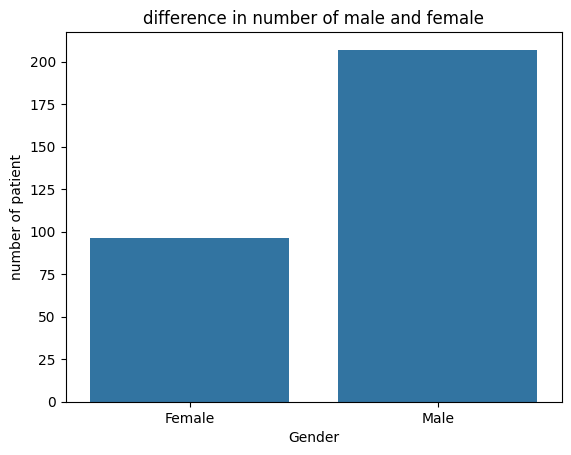

In [34]:
# checking number of male and female
sns.barplot(x=df['sex'].value_counts().index, y=df['sex'].value_counts())
plt.xlabel('Gender')
plt.ylabel("number of patient")
plt.title("difference in number of male and female")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

Number of Male: 1300

Number of Female: 588


This are the total number of patients, now we gonna see how many of them has chances for heart attack

In [35]:
# Checking how many number of patients has chances for heart attack
gender_target = df.groupby(['sex', 'target']).size().unstack()

gender_target

target,0,1
sex,,
0,24,72
1,114,93


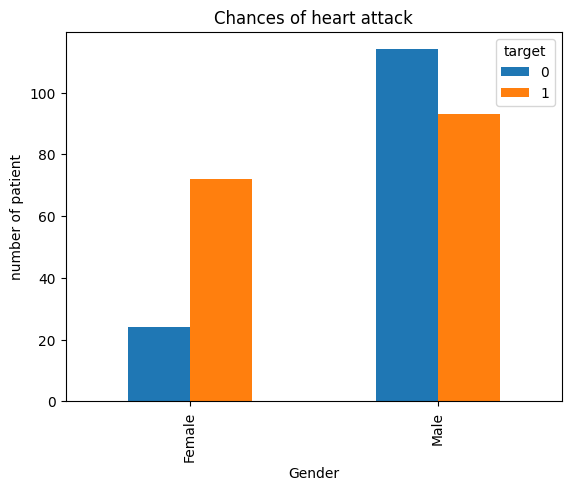

In [36]:
gender_target.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel("number of patient")
plt.title("Chances of heart attack")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# Chest Pain

In Heart Attack scenario chest pain is the most crucial part.

In [37]:
# checking how many patient got which type of chest pain
chest_pain = df.groupby(['sex', 'cp']).size().unstack()
chest_pain

cp,0,1,2,3
sex,,,,
0,39,18,35,4
1,104,32,52,19


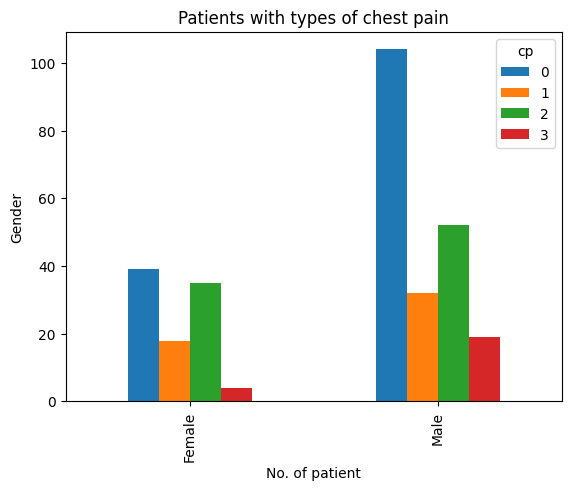

In [38]:
chest_pain.plot(kind='bar')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel("No. of patient")
plt.ylabel("Gender")
plt.title("Patients with types of chest pain")
plt.show()

As the number increases in chart's legend, danger increases

0 = Typical angina

1 = Atypical angina

2 = Non-anginal pain

3 = Asymptomatic

4 = Psychogenic Chest Pain

In [39]:
# cheacking the number of major vessels which are coloured by fluroscopy
df['ca'].unique()

array([0, 2, 1, 3, 4])

In [40]:
vessels_by_fluroscopy = df.groupby(['sex', 'ca']).size().unstack()
vessels_by_fluroscopy

ca,0,1,2,3,4
sex,,,,,
0,64.0,15.0,13.0,4.0,NaN
1,111.0,50.0,25.0,16.0,5.0


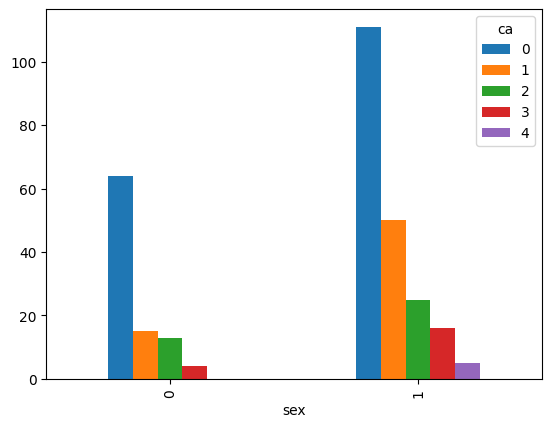

In [41]:
vessels_by_fluroscopy.plot(kind='bar')
plt.show()

# Heatmap

Checking if Chest pain and Vessel colour has anything to do with Target(Chances of getting heart attack.)

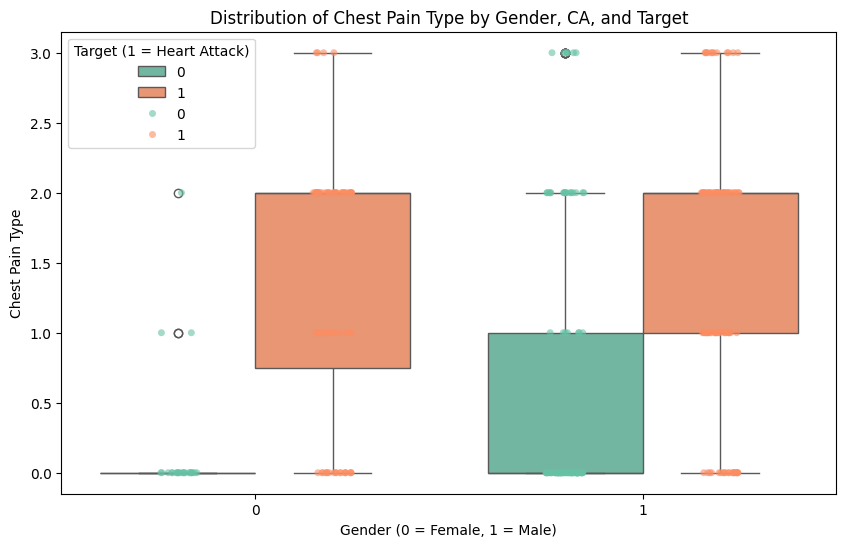

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='cp', hue='target', palette='Set2')
sns.stripplot(data=df, x='sex', y='cp', hue='target', dodge=True, alpha=0.6, jitter=True, palette='Set2')
plt.title('Distribution of Chest Pain Type by Gender, CA, and Target')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Chest Pain Type')
plt.legend(title='Target (1 = Heart Attack)')
plt.show()

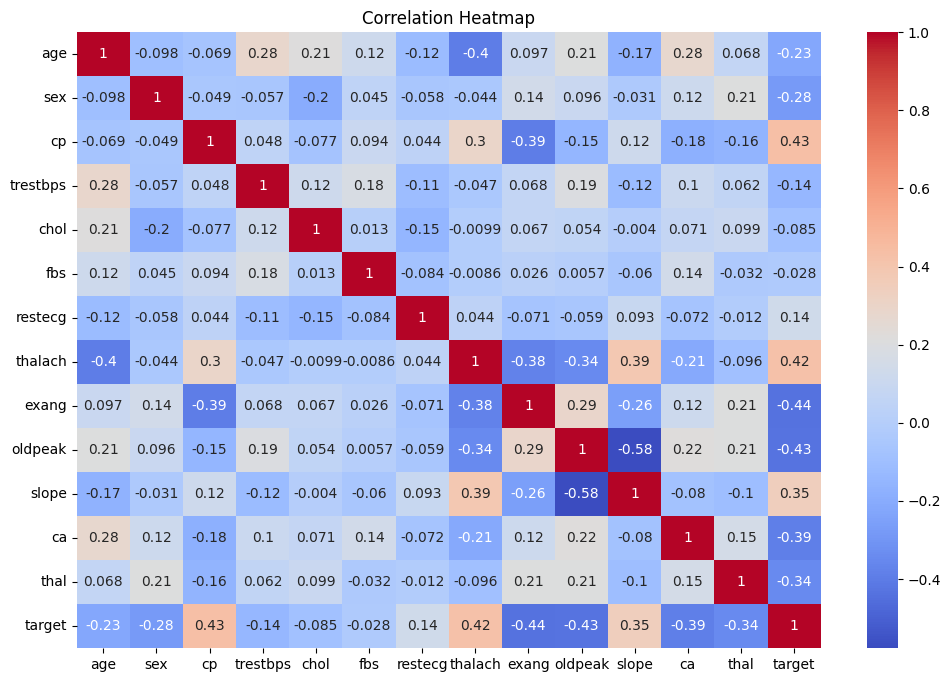

In [43]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#General Observations from the Heatmap
**Strongest correlations with the target (last row/column):**

thalachh (maximum heart rate achieved) has a moderate positive correlation with the target.

cp (chest pain type) also shows a notable positive correlation with the target.

Features like exang (exercise-induced angina), oldpeak (ST depression), and ca (number of major vessels) show moderate negative correlations with the target.

#Feature Description:

Age Correlation with target: Slight negative correlation (-0.18). Older individuals might have a lower probability of the target outcome.

Gender Correlation with target: Negative (-0.23). Gender might influence the target outcome.

0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic, 4 = Psychogenic Chest Pain.
Chest pain Correlation with target: Positive (0.31). Certain chest pain types are more associated with the target outcome.

trestbps(resting blood pressure) Correlation with target: Slight negative correlation (-0.12). No strong link to the target.

Chol(cholesterol) Correlation with target: Very weak negative correlation (-0.088). Cholesterol levels might not strongly influence the target outcome.

align=centerfbs Correlation with target: Very weak negative correlation (-0.039). Fasting blood sugar might not have a significant impact.

restecg 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy.
Correlation with target: Weak positive correlation (0.096). Some ECG results might indicate the target outcome.

thalachh(maximum heart rate achieved) Correlation with target: Positive (0.36). Higher heart rates are more associated with the target outcome.

exang(exercise - inclued angina) Correlation with target: Negative (-0.38). Exercise-induced angina is inversely related to the target outcome.

oldpeack Correlation with target: Negative (-0.38). Higher values indicate worse outcomes for the target.

1 = Upsloping, 2 = Flat, 3 = Downsloping.
slop Correlation with target: Positive (0.32). The slope of the ST segment is linked to the target outcome.

ca(number of major vessels colored by fluoroscopy) Correlation with target: Negative (-0.33). More vessels indicate worse outcomes.

3 = Normal, 6 = Fixed defect, 7 = Reversible defect.
thal(thalassemina) Correlation with target: Negative (-0.26). Some thalassemia types are linked to worse outcomes.

target: 1 = Presence of heart disease, 0 = Absence of heart disease.

The dataset contains several features that are moderately correlated with the target variable, including cp, thalachh, slope, ca, and exang. These could be key predictors for a machine learning model.

#ML

#4 Data Preprocessing

In [44]:
# just in case if i messed up
df1 = pd.get_dummies(df, drop_first=True)

In [45]:
# Splitting features and target
X = df.drop(columns=['target'])     # remove target column
y = df['target']                    # remove all column except target

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#5 Model Selection and Training


Accuracy Score: 0.8524590163934426
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



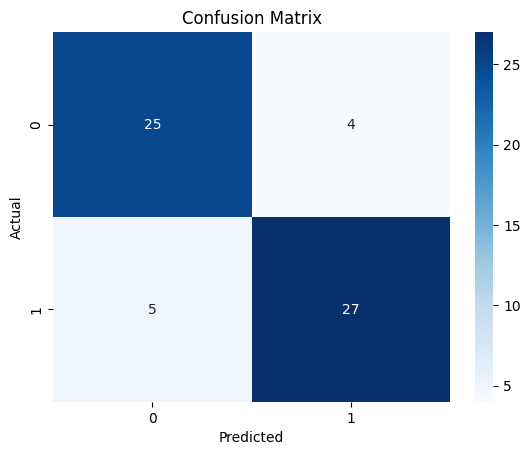

In [46]:
# Using logisticregression
model = LogisticRegression()

# train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
# checking how model performs
examples = [
    [60, 1, 3, 140, 250, 0, 1, 145, 0, 1.2, 1, 0, 3],
    [45, 0, 0, 130, 220, 0, 1, 160, 0, 0.5, 2, 0, 2],
    [67, 1, 2, 150, 270, 1, 0, 120, 1, 2.0, 1, 2, 3],
    [50, 0, 1, 110, 180, 0, 0, 155, 0, 0.0, 2, 0, 3],
    [55, 1, 2, 145, 230, 1, 0, 150, 0, 1.5, 2, 1, 3],
    [42, 0, 1, 125, 210, 0, 1, 170, 0, 0.8, 1, 0, 2],
    [70, 1, 0, 160, 300, 1, 1, 110, 1, 3.2, 2, 2, 3],
    [39, 0, 3, 135, 190, 0, 0, 130, 0, 0.2, 0, 0, 2],
    [65, 1, 1, 140, 260, 1, 0, 125, 1, 2.3, 2, 2, 3],
    [50, 0, 2, 120, 180, 0, 1, 160, 0, 0.9, 1, 0, 2],
    [58, 1, 0, 150, 240, 1, 0, 140, 0, 1.8, 2, 1, 3],
    [47, 0, 3, 130, 200, 0, 0, 145, 0, 0.4, 1, 0, 2],
    [62, 1, 2, 155, 250, 1, 1, 135, 1, 2.1, 2, 2, 3],
    [35, 0, 1, 125, 170, 0, 0, 150, 0, 0.3, 0, 0, 2],
    [68, 1, 2, 145, 280, 1, 0, 120, 1, 2.5, 1, 2, 3],
    [52, 0, 0, 135, 220, 0, 1, 155, 0, 1.0, 2, 0, 2],
    [41, 0, 1, 115, 200, 0, 0, 170, 0, 0.6, 0, 0, 2],
    [64, 1, 3, 150, 290, 1, 1, 125, 1, 2.8, 2, 2, 3],
    [48, 0, 2, 140, 210, 0, 1, 160, 0, 0.7, 1, 0, 2],
    [75, 1, 1, 160, 310, 1, 0, 115, 1, 3.5, 2, 2, 3],
    [53, 0, 0, 130, 195, 0, 1, 145, 0, 1.1, 1, 0, 2],
    [60, 1, 3, 145, 275, 1, 0, 130, 1, 1.9, 2, 1, 3],
    [46, 0, 1, 125, 185, 0, 0, 165, 0, 0.4, 0, 0, 2],
    [61, 1, 2, 150, 265, 1, 1, 120, 1, 2.6, 2, 2, 3],
    [49, 0, 0, 140, 200, 0, 1, 155, 0, 0.8, 1, 0, 2]
]

# Creating a for loop to make my life a little less heart-attack-inducing.
for i, example in enumerate(examples, start=1):
    example_df = pd.DataFrame([example], columns=X.columns)  # Ensure this has the correct columns
    example_scaled = scaler.transform(example_df)
    prediction = model.predict(example_scaled)
    print(f"Prediction for Example {i} (Heart Disease Risk):", "Yes" if prediction[0] == 1 else "No")

Prediction for Example 1 (Heart Disease Risk): Yes
Prediction for Example 2 (Heart Disease Risk): Yes
Prediction for Example 3 (Heart Disease Risk): No
Prediction for Example 4 (Heart Disease Risk): Yes
Prediction for Example 5 (Heart Disease Risk): No
Prediction for Example 6 (Heart Disease Risk): Yes
Prediction for Example 7 (Heart Disease Risk): No
Prediction for Example 8 (Heart Disease Risk): Yes
Prediction for Example 9 (Heart Disease Risk): No
Prediction for Example 10 (Heart Disease Risk): Yes
Prediction for Example 11 (Heart Disease Risk): No
Prediction for Example 12 (Heart Disease Risk): Yes
Prediction for Example 13 (Heart Disease Risk): No
Prediction for Example 14 (Heart Disease Risk): Yes
Prediction for Example 15 (Heart Disease Risk): No
Prediction for Example 16 (Heart Disease Risk): Yes
Prediction for Example 17 (Heart Disease Risk): Yes
Prediction for Example 18 (Heart Disease Risk): No
Prediction for Example 19 (Heart Disease Risk): Yes
Prediction for Example 20 (He

#feature Importance in dataset

to know which feature mostly affects the cause of heart attack!

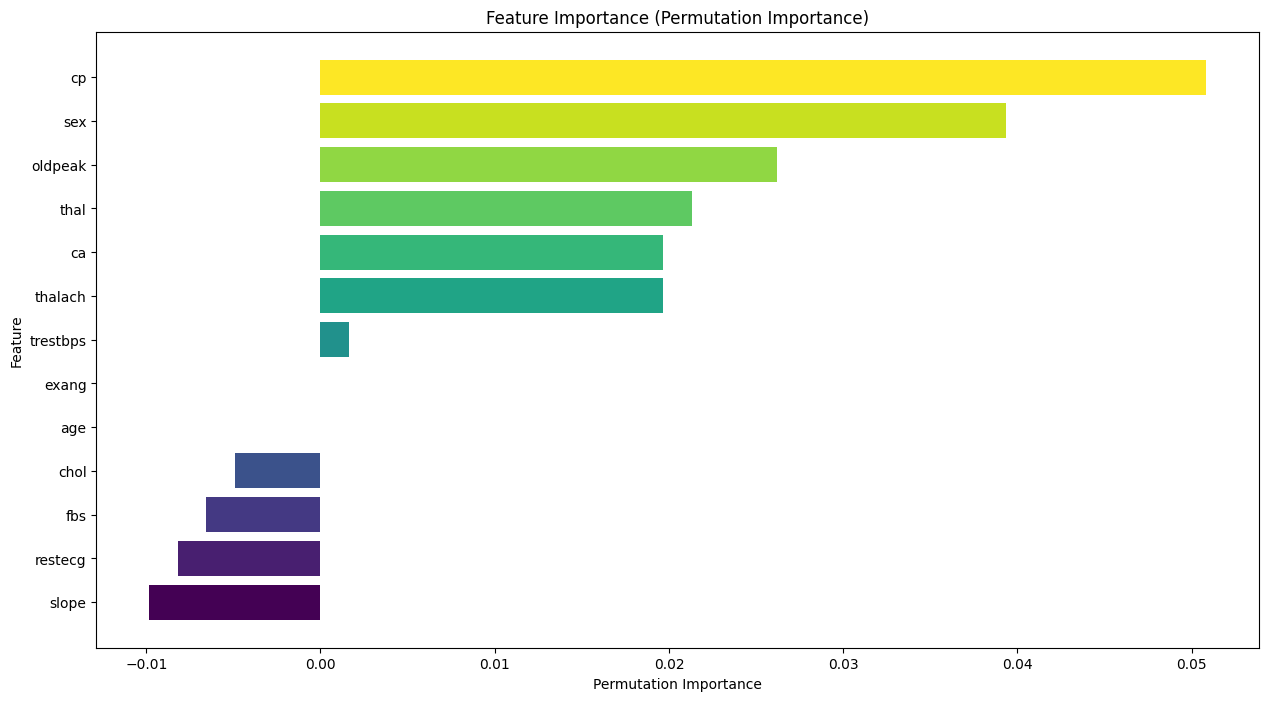

In [48]:
from sklearn.inspection import permutation_importance  # For calculating feature importance
import matplotlib.pyplot as plt
import numpy as np

# Calculate permutation importance for the model on test data
# n_repeats: number of shuffles for each feature; random_state ensures reproducibility
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get indices of features sorted by their mean importance (ascending order)
sorted_idx = perm_importance.importances_mean.argsort()

# Create a colormap with unique colors for each feature
# np.linspace creates a gradient of values between 0 and 1 for the number of features
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_idx)))


plt.figure(figsize=(15, 8))

# barh: horizontal bar chart
# X.columns[sorted_idx]: feature names sorted by importance
# perm_importance.importances_mean[sorted_idx]: importance values in sorted order
# color=colors: assign each feature a unique color
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color=colors)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Permutation Importance)')
plt.show()

#Importance of Making a Heart Disease Prediction

Machine learning models like the one demonstrated here can assist healthcare professionals by providing a second opinion based on patient data. This can:

1. Improve diagnosis accuracy.
2. Enable early detection, reducing severe outcomes.
3. Optimize resource allocation in healthcare facilities.
4. Foster research in predictive analytics for various diseases.
5. This project underscores the transformative role of technology in modern medicine.